In [10]:
# SYMPY code for ee-Z-WW (s-channel) amplitude and total cross-section

In [11]:
#!python -m pip install sympy

In [1]:
from sympy import *
import prof_berger.heppackv0 as hep 


Reading heppackv0.py (March 2023)

Done


### Auxiliary Functions

In [2]:
# Function to search for a symbol in a expression
def find_symbol(expr, target: str):
    for symbol in expr.free_symbols:
        if symbol.name == target:
            return symbol
    print(f"Symbol {target} not found. \n The symbols in the expression are {expr.free_symbols}")
    return None

# Unify the symbols of different expressions
def unify_symbols(expr1, expr2):
    symbols_expr1 = set([x.name for x in expr1.free_symbols])
    symbols_expr2 = set([x.name for x in expr2.free_symbols])

    common_symbols = symbols_expr1.intersection(symbols_expr2)
    #print(common_symbols)

    symbol_mapping = {}
    for symbol in common_symbols:
        new_symbol = Symbol(symbol)
        symbol_mapping[symbol] = new_symbol

    #print(symbol_mapping)
    expr1 = expr1.subs(symbol_mapping)
    expr2 = expr2.subs(symbol_mapping)

    return expr1, expr2

# Define LaTeX expressions
# Parse the LaTeX expressions - EXAMPLE
# Unify symbols with the same text names
#unified_expr1, unified_expr2 = unify_symbols(expr1, expr2)
#dl.replace(dl.args[1].args[0], n)
#print("Unified Expression 1:", unified_expr1)
#print("Unified Expression 2:", unified_expr2)

# Steps for SYMPY calculation

--> The following calculations were based on Prof. Christoph Berger work and functions for HEP calculation on Sympy.

-> Modifications by me, for the original, see his notebooks. https://profchristophberger.com/lehrbuch-elementarteilchenphysik/python/

---
---
---

## Process: $\nu_e(p_1)+\bar \nu_e(p_2)\to S(q) \to W^-_0(k_1)+W^+_0(k_2)$

### Symbols, vectors and constants


In [3]:
## latex symbols doesn't need "$" 
theta, r = symbols('theta r', positive=True)

s, t, u, p, s0, t0, u0, phi, P, Gamma = symbols('s t u p s_0 t_0 u_0 phi P Gamma', real=True, positive=True)

EN, Mmed, MS, mf, mi, m1, m2, m3, m4 = symbols(r'EN M_{med} M_{S} m_{f} m_{i}, m_1 m_2 m_3 m_4', real=True, positive=True)

# Electroweak constants
cv, ca, gz, gw, thetaw, gs_theta, gw_theta = symbols(r'c_v c_a g_Z g_W theta_W g_S_theta g_W_theta', real=True, positive=True )


In [4]:
# 2 -> 2 process, p1, p2 -> q -> k1, k2
p1 = Matrix([sqrt(s)/2, 0, 0, 0])
p2 = Matrix([sqrt(s)/2, 0, pi, pi])
k1 = Matrix([sqrt(s)/2, mf, theta, 0])
k2 = Matrix([sqrt(s)/2, mf, pi-theta, pi])




### Premisses

According to the examples of Prof. Berger, we can define two currents and obtain the corresponding amplitude through the dot product between the two, without the need for any tricks, averages, or trace properties of gamma matrices.
Furthermore, the propagators are already included in the currents, so just multiply "one side by the other" of the diagram to obtain the corresponding amplitude.

The amplitude for the process we are interested in can be written according to the equation below, taken from the Quigg book.

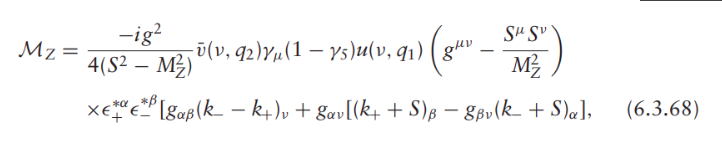

Where the full form of the S scalar propagator, is given by

$$\frac{i}{q^2 - M_{S}^2}$$

###  

In [5]:
## Breit-Wigner denominator, to be added in the end of the calculation for simplicity. 
denom = ((s - Mmed**2)**2 + (Mmed * Gamma)**2);denom

#### Mandelstam kinematics

In [6]:
## s, t, u definition

fp1 = hep.fourvec(p1)
fp2 = hep.fourvec(p2)
fk1 = hep.fourvec(k1)
fk2 = hep.fourvec(k2)

sm = hep.dotprod4(fp1 + fp2, fp1 + fp2)
tm = hep.dotprod4(fp1 - fk1, fp1 - fk1)
um = hep.dotprod4(fp1 - fk2, fp1 - fk2)


q_med = fp1 + fp2
mmed = Mmed


In [7]:
#Routine for evaluating all helicities at once

jW_hel = []

for h1 in [-1, 1]:
    for h2 in [-1, 1]:
        jW_hel.append(hep.vbu_SDM(p2, h2, p1, h1, q_med, mmed, cv, ca, secterm = False))  ## vbuwMB_noqq is a modification of Prof. Berger's "hep.vbuva" for the current process 

V3_hel = []
for h1 in [-1, 0, 1]:
    for h2 in [-1, 0, 1]:
        V3_hel.append(hep.V3ZOutOut_VDM(k1, h2, k2, h1, q_med, mmed, cv, ca, secterm = False )) ## V3ZOutOut_noqq is a modification of Prof. Berger's "hep.V3gOutOut" for the current process 

w3 s/(2*M_{med})
w4 s/(2*M_{med})
w3 s/(2*M_{med})
w4 s/(2*M_{med})
w3 s/(2*M_{med})
w4 s/(2*M_{med})
w3 s/(2*M_{med})
w4 s/(2*M_{med})
w3 s/(2*M_{med})
w4 s/(2*M_{med})
w3 s/(2*M_{med})
w4 s/(2*M_{med})
w3 s/(2*M_{med})
w4 s/(2*M_{med})
w3 s/(2*M_{med})
w4 s/(2*M_{med})
w3 s/(2*M_{med})
w4 s/(2*M_{med})


In [12]:
# # Same above, but here the currents have the complete mediator expression, without any approximations

# q_mediator = fp1 + fp2
# mmed = MZ

# jW_hel = []

# for h1 in [-1, 1]:
#     for h2 in [-1, 1]:
#         jW_hel.append(hep.vbuwMB(p2, h2, p1, h1, q_mediator, mmed, cv, ca))

# V3_hel = []
# for h1 in [-1, 0, 1]:
#     for h2 in [-1, 0, 1]:
#         V3_hel.append(hep.V3ZOutOut(k1, h2, k2, h1, q_mediator, mmed, cv, ca))

In [8]:
## Get the dot product of the two currents, for all helicities

Tn = []

for jW in jW_hel:
    for V3 in V3_hel:

        Tn.append(simplify(hep.dotprod4(jW , V3)))

In [9]:
import pickle

# Salvar um objeto em formato pickle no disco
def save_obj(objeto, nome_arquivo):
    with open(nome_arquivo, 'wb') as arquivo:
        pickle.dump(objeto, arquivo)
    print(f"Objeto salvo em {nome_arquivo}")

# Carregar um objeto em formato pickle do disco
def load_obj(nome_arquivo):
    with open(nome_arquivo, 'rb') as arquivo:
        objeto = pickle.load(arquivo)
    return objeto


In [78]:
save_obj(Tn, 'Tn_DM_noqq.pkl')

Objeto salvo em Tn_DM_noqq.pkl


In [75]:
save_obj(Tn, 'Tn_DM.pkl')

Objeto salvo em Tn_DM.pkl


In [10]:
# Tn is a list with all terms, including the vanishing ones, from the dot product of the currents 
Tn_DM_noqq = load_obj('Tn_DM_noqq.pkl')
Tn_DM = load_obj('Tn_DM.pkl')

#Tn_SM

In [11]:
# Some auxiliar variables
beta, xi = symbols(r'beta xi', real=True, positive=True)

In [12]:
# Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
Tres = 0
Tn = Tn_DM_noqq
for T in Tn:
    res = T.subs(sm, s).subs(sqrt(s - 4*mf**2), xi)
    Tres +=  res * conjugate(res) ## Summing Squared

# Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
Tres_DM_noqq = Tres / 4 # Averaging over the incoming helicities

Tres_SM = Tres_DM_noqq

# Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
Tres = 0
Tn = Tn_DM
for T in Tn:
    res = T.subs(sm, s).subs(sqrt(s - 4*mf**2), xi)
    Tres +=  res * conjugate(res) ## Summing Squared

# Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
Tres_DM = Tres / 4 # Averaging over the incoming helicities



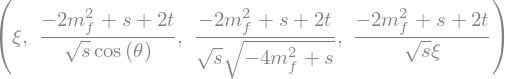

In [13]:
## Here we make some substitutions based on the Mandelstam variables kinematics 

sCM = 4*EN**2

tCM = mi**2 + mf**2 - 2*EN**2 + 2*sqrt(EN**2 - mi**2) * sqrt(EN**2-mf**2) * cos(theta)
tCM = tCM.subs(EN, sqrt(s)/2).subs(sqrt(s - 4*mf**2), xi).subs(sqrt(s - Mmed**2), xi)

# t0CM= tCM - m**2 - MW**2

cost = solve(tm - t, cos(theta))
cost = simplify(cost[0])  #.subs(sqrt(s - 4*MW**2), xi)

cost_xi = simplify(cost).subs(sqrt(s - 4*mf**2), xi)
xi_t = solve(cost_xi - cos(theta), xi)[0]

xi, xi_t, cost, cost_xi


# Ampsquared $| \mathcal M |^2$ evaluation

## First, lets compare with the SM results

In [12]:
## Simplifications, impliying c_v and c_a for neutrino pairs (for other fermions, just replace it for the correct Electroweak coupling)

# More substituions, to get rid of the trigonometric functions
Tres_m_SM = Tres_SM
Tres_m_SM = Tres_m_SM.subs(sin(theta), sqrt(1 - cost_xi**2)).subs(cos(theta), cost_xi).subs(EN**2, s/4).subs(mi, 0); Tres_m_SM


Tres_SM = simplify(Tres_m_SM)


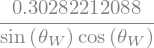

In [157]:
gz

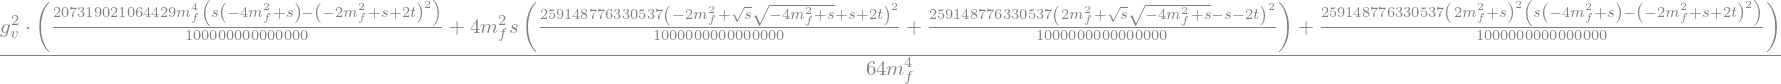

In [23]:
## Replace gr -> 0 and gl -> 1, and gla and glv = ca  = 1/2 and  glv = cv = 1/2 
## Find the c_v and c_a symbols inside the expression

cvv = find_symbol(Tres_SM, r'g_{la}')
caa = find_symbol(Tres_SM, r'g_{lv}')
gr =  find_symbol(Tres_SM, r'g_r')
gl =  find_symbol(Tres_SM, r'g_l')
gf, thetaW =  symbols(r'g_f theta_W')

#SM COUPLINGS
import numpy as np
ge = 0.30282212088  #*np.pi*4                  #  ge = e (for h = c = 1 ref. Grif)  // alphaQED = e^2 / 4*Pi 
alph =  ge**2 / (4*np.pi)      # (1/137)    # QED coupling constant

thetaW =  28.759 * (np.pi/180)  ## Weinberg angle
cve = (-1/2) + (2 * (sin(thetaW)**2))
cae = -1/2
gz = ge / (sin(thetaW) * cos(thetaW))


Tres_simp = Tres_SM.subs(cvv, cve).subs(caa, cae).subs(gr, 0).subs(gl, gz) ## replace by 1/2, for a incoming neutrino pair
Tres_simp = nsimplify(Tres_simp).subs(xi, sqrt(s - 4*mf**2))  ## simplify

Tres_simp

In [24]:
Tres_simp = nsimplify(expand(Tres_simp))

## Some functions to give a pretier expression
amp_squared =  together(collect(nsimplify(expand(collect(Tres_simp, mf))), mf)) / denom 

In [25]:
## hocus pocus to factor (-1) out from the expression

amp_squaredm = - amp_squared
amp_squared_SM = -1 * simplify(amp_squaredm) 

Objeto salvo em amp_squared_SM.pkl


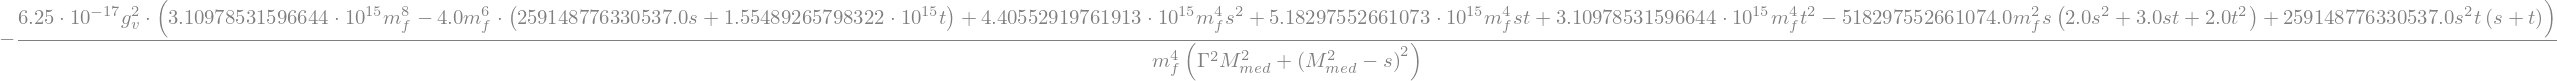

In [28]:
save_obj(amp_squared_SM, 'amp_squared_SM.pkl')
N(amp_squared_SM)

Squared amplitude result for the same process via FeynCalc, using Mathematica

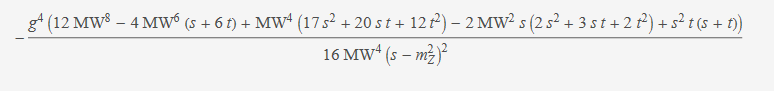

## Now, the DM scenario

### DM With second term

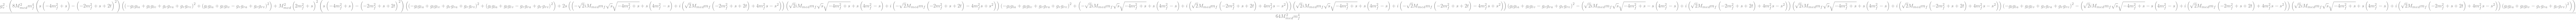

In [14]:
## Simplifications, impliying c_v and c_a for neutrino pairs (for other fermions, just replace it for the correct Electroweak coupling)


# More substituions, to get rid of the trigonometric functions
Tres_m_DM = Tres_DM
Tres_m_DM = Tres_m_DM.subs(sin(theta), sqrt(1 - cost_xi**2)).subs(cos(theta), cost_xi).subs(EN**2, s/4).subs(mi, 0)

Tres_DM = simplify(Tres_m_DM)

Tres_DM_simp = nsimplify(Tres_DM).subs(xi, sqrt(s - 4*mf**2))  ## simplify

Tres_DM_simp


In [15]:
Tres_DM_simp = nsimplify(expand(Tres_DM_simp))

## Some functions to give a pretier expression
amp_squared =  together(collect(nsimplify(expand(collect(Tres_DM_simp, mf))), mf)) / denom 

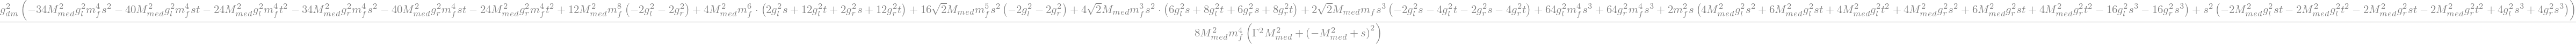

In [16]:
## To simplify evenfurther, we can define two couplings, one from SM with Z' and other from Z' with the DM sector. Let's call it gsm and gdm respectively, where

sub_expr = amp_squared
gla = find_symbol(sub_expr, r'g_{la}')
glv = find_symbol(sub_expr, r'g_{lv}')
gra = find_symbol(sub_expr, r'g_{ra}')
grv = find_symbol(sub_expr, r'g_{rv}')
gr =  find_symbol(sub_expr, r'g_r')
gl =  find_symbol(sub_expr, r'g_l')
gv =  find_symbol(sub_expr, r'g_v')

gsm, gdm =  symbols(r'g_{sm} g_{dm}')

## Replace SM part
amp_squaredm_gsmdm = sub_expr.subs([(simb, 1) for simb in [gla, glv, gra, grv]]) #.subs([(simb, gsm) for simb in [gr, gl]])

## Replace DM part
amp_squaredm_gsmdm = amp_squaredm_gsmdm.subs(gv, gdm)
amp_squaredm_gsmdm

In [17]:
amp_squaredm_gsmdm = nsimplify(expand(amp_squaredm_gsmdm))

## Some functions to give a pretier expression
amp_squared_DM =  together(collect(nsimplify(expand(collect(amp_squaredm_gsmdm, mf))), mf))


amp_squared_DM = - amp_squared_DM
amp_squared_DM = -1 * simplify(amp_squared_DM) 


Objeto salvo em amp_squared_DM.pkl


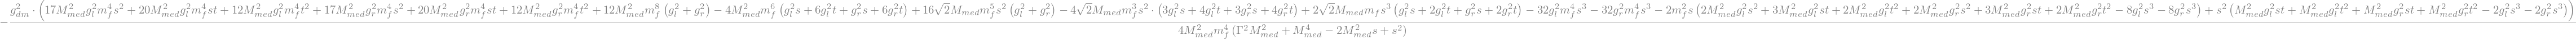

In [18]:
save_obj(amp_squared_DM, 'amp_squared_DM.pkl')
amp_squared_DM

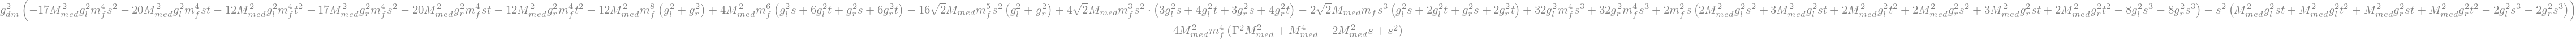

In [19]:
simplify(amp_squared_DM)

### Without the second term

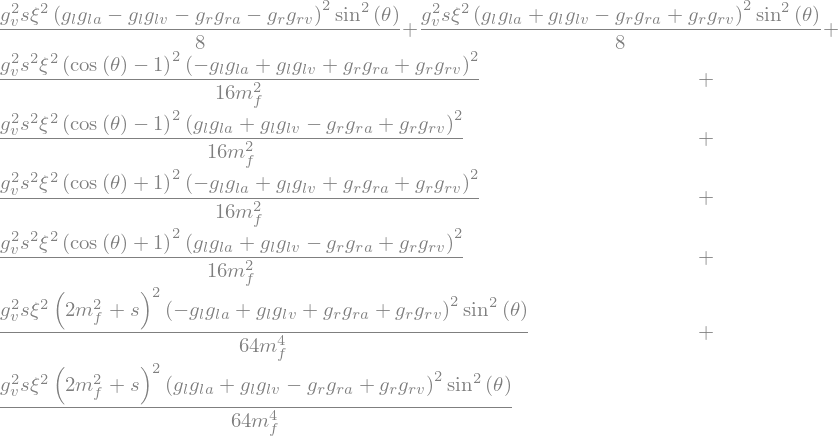

In [20]:
Tres_DM_noqq

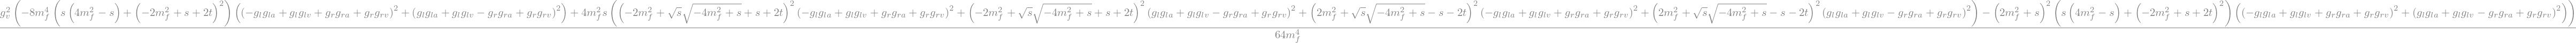

In [71]:
# More substituions, to get rid of the trigonometric functions
Tres_m_DM_noqq = Tres_DM_noqq
Tres_m_DM_noqq = Tres_m_DM_noqq.subs(sin(theta), sqrt(1 - cost_xi**2)).subs(cos(theta), cost_xi).subs(EN**2, s/4).subs(mi, 0)

Tres_m_DM_noqq = simplify(Tres_m_DM_noqq)

Tres_m_DM_noqq = nsimplify(Tres_m_DM_noqq).subs(xi, sqrt(s - 4*mf**2))  ## simplify

Tres_m_DM_noqq = simplify(Tres_m_DM_noqq)
Tres_m_DM_noqq

In [72]:
Tres_DM_noqq_simp = nsimplify(Tres_m_DM_noqq).subs(xi, sqrt(s - 4*mf**2))  ## simplify

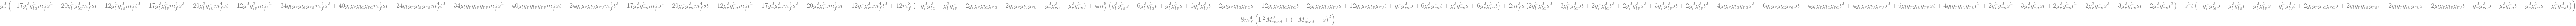

In [74]:
Tres_DM_noqq_simp = nsimplify(expand(Tres_DM_noqq_simp))

## Some functions to give a pretier expression
amp_squared =  together(collect(nsimplify(expand(collect(Tres_DM_noqq_simp, mf))), mf)) / denom 
amp_squared

In [75]:
## To simplify evenfurther, we can define two couplings, one from SM with Z' and other from Z' with the DM sector. Let's call it gsm and gdm respectively, where
sub_expr = amp_squared
gla = find_symbol(sub_expr, r'g_{la}')
glv = find_symbol(sub_expr, r'g_{lv}')
gra = find_symbol(sub_expr, r'g_{ra}')
grv = find_symbol(sub_expr, r'g_{rv}')
gr =  find_symbol(sub_expr, r'g_r')
gl =  find_symbol(sub_expr, r'g_l')
gv =  find_symbol(sub_expr, r'g_v')

gsm, gdm =  symbols(r'g_{sm} g_{dm}')

## Replace SM part
amp_squaredm_gsmdm_noqq = sub_expr.subs([(simb, 1) for simb in [gla, glv, gra, grv]]).subs([(simb, gsm) for simb in [gr, gl]])

## Replace DM part
amp_squared_DM_noqq = amp_squaredm_gsmdm_noqq.subs(gv, gdm)


Objeto salvo em amp_squared_DM_noqq.pkl


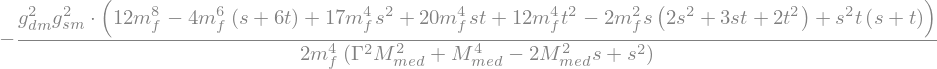

In [76]:
amp_squared_DM_noqq = nsimplify(expand(amp_squared_DM_noqq))

## Some functions to give a pretier expression
amp_squared_DM_noqq =  together(collect(nsimplify(expand(collect(amp_squared_DM_noqq, mf))), mf))


amp_squared_DM_noqq = - amp_squared_DM_noqq
amp_squared_DM_noqq = -1 * simplify(amp_squared_DM_noqq) 

save_obj(amp_squared_DM_noqq, 'amp_squared_DM_noqq.pkl')
amp_squared_DM_noqq

## $\frac{d \sigma}{dt}$ expression

In [21]:
## Gives the dsig_dt expression and the total x sec integrated (in t) cross section

def dsig_dt(amp_squared):

    # Golden factor  16\pi(s-m^2)^2
    prefactor = 16*pi*(s-mi**2)**2
    prefactor = prefactor.subs(mi, 0)

    dsig_dt =  amp_squared / prefactor


    ## Integration limits in function of t
    tUpper = (1/2) * (2*mi**2 + 2*mf**2 - s + sqrt((s - 4*mi**2)*(s - 4*mf**2)))
    tLower = (1/2) * (2*mi**2 + 2*mf**2 - s - sqrt((s - 4*mi**2)*(s - 4*mf**2)))


    tlower = together(nsimplify(tLower.subs(mi, 0))) 
    tupper = together(nsimplify(tUpper.subs(mi, 0))) 


    totalxsec = 2*pi * integrate(dsig_dt, (t, tlower, tupper))
    totalxsec = simplify(totalxsec)


    return dsig_dt, totalxsec


In [22]:
#_, sigma_SM = dsig_dt(amp_squared_SM)
_, sigma_DM = dsig_dt(amp_squared_DM)
#_, sigma_DM_noqq = dsig_dt(amp_squared_DM_noqq)


In [23]:
sigma_SM

NameError: name 'sigma_SM' is not defined

In [24]:
sigma_DM = simplify(collect(collect(sigma_DM, (gr**2)), gl**2))

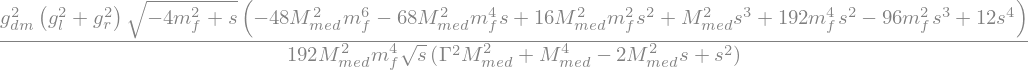

In [25]:
sigma_DM

In [26]:
latex(sigma_DM)

'\\frac{g_{dm}^{2} \\left(g_{l}^{2} + g_{r}^{2}\\right) \\sqrt{- 4 m_{f}^{2} + s} \\left(- 48 M_{med}^{2} m_{f}^{6} - 68 M_{med}^{2} m_{f}^{4} s + 16 M_{med}^{2} m_{f}^{2} s^{2} + M_{med}^{2} s^{3} + 192 m_{f}^{4} s^{2} - 96 m_{f}^{2} s^{3} + 12 s^{4}\\right)}{192 M_{med}^{2} m_{f}^{4} \\sqrt{s} \\left(\\Gamma^{2} M_{med}^{2} + M_{med}^{4} - 2 M_{med}^{2} s + s^{2}\\right)}'

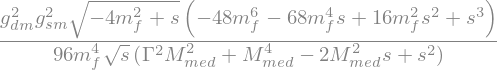

In [81]:
sigma_DM_noqq

In [140]:
# Prettier...
totalxsec = simplify(expand(totalxsec * denom)) / denom

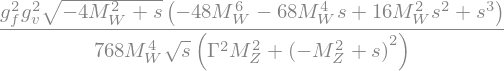

In [142]:
totalxsec

In [143]:
latex(totalxsec)

'\\frac{g_{f}^{2} g_{v}^{2} \\sqrt{- 4 M_{W}^{2} + s} \\left(- 48 M_{W}^{6} - 68 M_{W}^{4} s + 16 M_{W}^{2} s^{2} + s^{3}\\right)}{768 M_{W}^{4} \\sqrt{s} \\left(\\Gamma^{2} M_{Z}^{2} + \\left(- M_{Z}^{2} + s\\right)^{2}\\right)}'

$$ \sigma_{\nu_e \bar \nu_e \to Z \to W^+ W^-} = \frac{g_{f}^{2} g_{v}^{2} \sqrt{- 4 M_{W}^{2} + s} \left(- 48 M_{W}^{6} - 68 M_{W}^{4} s + 16 M_{W}^{2} s^{2} + s^{3}\right)}{768 M_{W}^{4} \sqrt{s} \left(\Gamma^{2} M_{Z}^{2} + \left(- M_{Z}^{2} + s\right)^{2}\right)} $$

# Plots

## Extract the function in python source

In [43]:
# Transformando a expressão em uma função Python
#sigma_SM_func = lambdify((s, Mmed, mf, gf, gv, Gamma), sigma_SM, 'numpy')

sigma_DM_func = lambdify((s, Mmed, mf, gr, gl, gv, Gamma), sigma_DM, 'numpy')


#sigma_DM_noqq_func = lambdify((s, Mmed, mf, gf, gv, Gamma), sigma_DM_noqq, 'numpy')

# Obtendo o código fonte da função
codigo_fonte = {}


#codigo_fonte['SM'] = sigma_SM_func
codigo_fonte['DM'] = sigma_DM_func
#codigo_fonte['DM_noqq'] = sigma_DM_noqq_func

import inspect
for name, func in codigo_fonte.items():

    print(inspect.getsource(func))


def _lambdifygenerated(s, M_med, m_f, g_r, g_l, g_v, Gamma):
    return (1/192)*g_dm**2*(g_l**2 + g_r**2)*sqrt(-4*m_f**2 + s)*(-48*M_med**2*m_f**6 - 68*M_med**2*m_f**4*s + 16*M_med**2*m_f**2*s**2 + M_med**2*s**3 + 192*m_f**4*s**2 - 96*m_f**2*s**3 + 12*s**4)/(M_med**2*m_f**4*sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))



In [3]:
## Implementios of the above extracted functions

import numpy as np
from numpy import sqrt as sqrt
from numpy import pi as pi

@np.vectorize
def sig_SM(s, M_med, m_f, g_f, g_v, Gamma):
    result = (1/768)*g_f**2*g_v**2*sqrt(-4*m_f**2 + s)*(-48*m_f**6 - 68*m_f**4*s + 16*m_f**2*s**2 + s**3)/(m_f**4*sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))

    if np.iscomplex(result):
        print(np.iscomplex(result))
        result = 0 

    return result

@np.vectorize
def sig_VDM(s, M_med, m_f, g_dm, g_sm, Gamma):
    result = (1/96)*g_dm**2*g_sm**2*sqrt(-4*m_f**2 + s)*(-48*M_med**2*m_f**6 - 68*M_med**2*m_f**4*s + 16*M_med**2*m_f**2*s**2 + M_med**2*s**3 + 192*m_f**4*s**2 - 96*m_f**2*s**3 + 12*s**4)/(M_med**2*m_f**4*sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))
    return result

@np.vectorize
def sig_VDM_noqq(s, M_med, m_f, g_dm, g_sm, Gamma):
    result = (1/768)*g_dm**2*g_sm**2*sqrt(-4*m_f**2 + s)*(-48*m_f**6 - 68*m_f**4*s + 16*m_f**2*s**2 + s**3)/(m_f**4*sqrt(s)*(Gamma**2*M_med**2 + M_med**4 - 2*M_med**2*s + s**2))
    return result


## OLDS
@np.vectorize
def GMV(s, mq, Mmed, mx, gr, gl, gx):
    if Mmed < 2*mx:
        return np.nan
    M = Mmed
    gxv = gx

    Gamma_VDM = gxv**2 * np.sqrt(1 - 4*mx**2/M**2) * (5*M**2 - 32*mx**2)/(96*np.pi*M)
    return Gamma_VDM


@np.vectorize
def sig0_V(s, mq, Mmed, mx, gr, gl, gx):    ## seção de choque e integração de "-t" a "+t"   

    if s < 4*(mx**2): ##Define the correct physical domain for s channel 
        return np.nan  
    
    else:
        M = Mmed
        #coupling control
        gxv = gx
        dmname = 'Vector'
        Bi = GM('SM').GMdecay(s, mq, Mmed, mx, gr, gl, gx)
        Bf = GM(dmname).GMdecay(s, mq, Mmed, mx, gr, gl, gx)
        Gamma = Bi + Bf

        coup = gxv**2 * (gl**2 + gr**2) 
        num1 = np.sqrt(s*(s - 4*mx**2))
        num2 = -48*mx**6 - 68*mx**4 * s + 16*mx**2 * s**2  + s**3


        numerator = coup * num1 * num2

        denom = 768* np.pi * mx**4 * s * ((s - M**2)**2  + Gamma**2 * M ** 2) 

        totalCS = numerator / denom


        return totalCS


In [4]:
### General Parameters
# MASSES (PDG 2018) (TeV) 
me = (511E-9)     #electron square mass  (TeV)
md = (2.2E-6) #  2.2 MeV +- 0.5 
mu = (4.7E-6) #  4.7 MeV +- 0.5
ms = (95E-6)  #  95 MeV +9 -3   
#mc = ...        #  1.275 GeV  +0.025 −0.035  
#mb = ...        #  4.18 GeV +0.04  −0.03 
#mt = ...        #  173.0 Gev +-0.04 
mmu = 105.66e-6
MZ = 91.1876e-3    # Z mass in TeV
MW = 80.379e-3     # W mass i TeV

mvec = [me, md, mu, ms, ms, mu, md] ## Quark masses vector
qid = [0, 1, 2, 3, -3, -2, -1]      ## quarks id (PDG) vector

## Gauge Couplings DM ##

### Following V2 scenario ## gl = 0.01, gq = 0.1

#gr0 = 0.01             #right coupling constant with SM, according to CMS parameters
#gl0 = 0.01             ## vetorial: gl = gr  ## axial: gl = -gr ## chiral: gl = 0

gr0 = 0.01             #right coupling constant with SM, according to CMS parameters
gl0 = 0.01             ## vetorial: gl = gr  ## axial: gl = -gr ## chiral: gl = 0

gx0 = 1.   # dark coupling constant
grx0 = gxs0 = gxv0 = gx0  # specific SFV dark couplings
glx0 = 1.

#SM COUPLINGS
ge = 0.30282212088  #*np.pi*4                  #  ge = e (for h = c = 1 ref. Grif)  // alphaQED = e^2 / 4*Pi 
alph =  ge**2 / (4*np.pi)      # (1/137)    # QED coupling constant

thetaW =  28.759 * (np.pi/180)  ## Weinberg angle
cv = (-1/2) + (2 * (np.sin(thetaW)**2))
ca = -1/2
gz = ge / (np.sin(thetaW) * np.cos(thetaW))
#gw = ...
## DM Masses ##
#mx = 
#Mmed

## conversion from TeV^-2 to fb
brn = 0.3894*10**6       
#Nfermions = 6 + (6*3)   ## 24, e, mu, tau, ne, nmu, ntau,( u, d, c, s , t , b) * 3 colors
Nfermions = 6


# ### Larger values will increase the processing time
# ###################################################
# ###################################################
binsize = 100
# ###################################################
# ###################################################

dM = 1/binsize
dmx = 0.5/binsize

#Mediator mass [Tev] # 
smax = 3**2
Mmed_min = 0.001
Mmed_max = 5.1
Mmed = np.arange(Mmed_min, Mmed_max, dM)

# DM particle mass [Tev] #
mx_min = 0.001
mx_max = 2.60
mx = np.arange(mx_min, mx_max, dmx)

# Define a grid
Mmed_grid, mx_grid = np.meshgrid(Mmed, mx) # grid formation for plot

In [50]:
gz

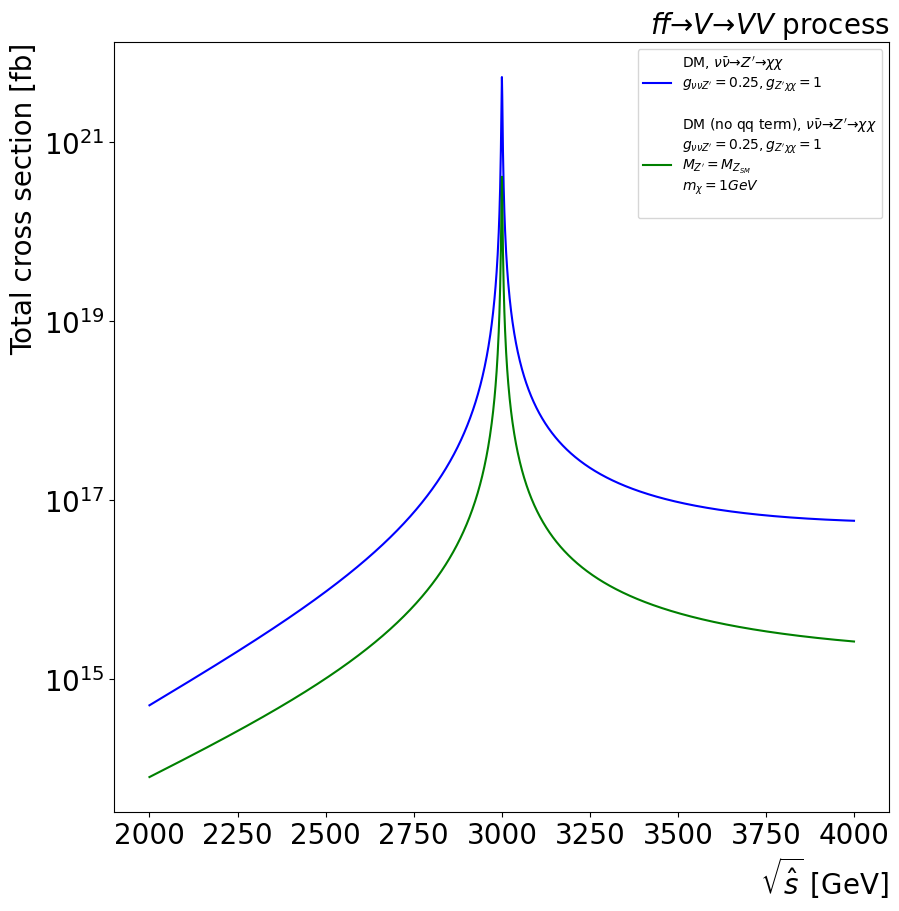

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi as pi

fig, ax = plt.subplots(figsize=(10, 10))


#fig = plt.figure(figsize=(20, 6))

Gamma_Z = 2.4952 * 1E-3 # GeV * 10E-3
Gamma_W = 2.085 * 1E-3

## DM Parameters

Mmed = 3
#mx = MZ / 3

#mx = MW
mx = 0.001
gdm = 1
gsm = 0.25 


ds = 0.001


svar = np.arange(2, 4, ds)**2

#sig_y = sig_SM(svar, MZ, MW, ge, gz, Gamma_Z)*brn

sig_y_DM = sig_VDM(svar, Mmed, mx, gdm, gsm, Gamma_Z) * brn

sig_y_DM_noqq = sig_VDM_noqq(svar, Mmed, mx, gdm, gsm, Gamma_Z) * brn

#ax.plot(np.sqrt(svar)*1E3, sig_y, 'r-', label=r"""SM, $\nu \bar \nu \to $ Z$\to W W$ 
#$g_{\nu \nu Z} = 0.30, g_{ZWW} = 0.71$
#""") 

ax.plot(np.sqrt(svar)*1E3, sig_y_DM, 'b-', label=r"""DM, $\nu \bar \nu \to  Z^\prime \to \chi \chi$
$g_{\nu \nu Z^\prime} = 0.25, g_{Z^\prime \chi \chi} = 1$
""") 

ax.plot(np.sqrt(svar)*1E3, sig_y_DM_noqq, 'g-', label=r"""DM (no qq term), $\nu \bar \nu \to  Z^\prime \to \chi \chi$
$g_{\nu \nu Z^\prime} = 0.25, g_{Z^\prime \chi \chi} = 1$
$M_{Z^\prime} = M_{Z_{SM}}$
$m_{\chi} = 1 GeV$
""") 


#print(sig_y)

plt.title(r'$ff \to V \to VV$ process', fontsize = 20, loc = 'right')
plt.xlabel(r'$\sqrt{\hat s}$ [GeV]', fontsize = 20, loc = 'right')
plt.ylabel(r'Total cross section [fb]', fontsize = 20, loc='top')
plt.legend()
#plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)

In [ ]:
#!/usr/bin/pythonpy
################################################################################
# PYTHON's MODULAE
# ------------------------------------------------------------------------------
################################################################################


import sys
import numpy as np
from numpy import sqrt as sqrt
from numpy import pi as pi
import models.general_parameters
import models.relic_density_calc
from models.general_parameters import *
from models.pdf_integration import *
from models.sigma0_xsections import *

#from models.sigma0_xsections_original import *
from models.relic_density_calc import *
from models.relic_density_calc import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colorbar as colorb
import functools
import importlib
## Saves the results for sigmaz locally
import pickle
import os
from scipy.integrate import quad


fig, ax = plt.subplots()
DMlist = dmnames

auxLabel = 'oficial'
for fignumber, dmname in enumerate(DMlist):
    
    fig = plt.figure(fignumber)
    auxLabel = auxLabel
    
    
    # Set up figure and image grid  
    if fignumber == 0:
        fig = plt.figure(figsize=(20, 6))
        ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(1,3),
                axes_pad=(0.15, 0.0),
                share_all=True,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.10,
                aspect=False
                )
        fsize = 18
                    # Colorbar
    
    ## Plot it in a color bar
    im = ax[fignumber].pcolormesh(Mmed_grid, mx_grid, sigmaz[f'{dmname}']*brn, norm=colors.LogNorm(vmin=1E0, vmax=1E15), cmap='plasma', rasterized=True) ## heat map of xsec
    
    
    #ax[fignumber].set_xlim(0, 5.2) ## plot 'resolution'

    ax[0].cax.cla()
    cb = colorb.Colorbar(ax[0].cax, im)
    ax[0].cax.toggle_label(True)
    cb.solids.set_rasterized(True)
    cb.set_label(r'$\sigma_{tot}$ [fb]', fontsize = fsize, loc='top')  ## color bar label 
    cb.ax.tick_params(labelsize=fsize+4)


    # ######################################################################################

        
    # M/2 line #
    x1, y1 = [Mmed[0], Mmed[-1]], [Mmed[0]/2, Mmed[-1]/2]
    ab, = ax[fignumber].plot(x1, y1, linewidth=1, color='grey', linestyle='dashed', label=r'${m_\chi } = {M_{med} }/2$')

    textstr = '\n'.join((
        r'$g_{SM} = %1.2f$, $g_{\chi} = %1.0f$' %(gr0, gx0),
        ))
    ax[0].plot([], [], label=textstr, color = 'None')


    ## Plot Labels ##

    ax[fignumber].axvline(x = 2.0, color='lightskyblue', linestyle='--', label='CMS/ATLAS')
    if fignumber == 0:
        ab, = plt.plot(x1, y1, linewidth=1, color='gray', linestyle='dashed', label=r'${m_\chi } = {M_{med} }/2$')
        ac, = plt.plot([], [], label=textstr, color = 'None')
        ac, = plt.plot([], [],  color='lightskyblue', linestyle='--', label=r'CMS/ATLAS $Z^{\prime}$ limit')


    ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize+5)


    ax[0].tick_params(axis="x", labelsize=fsize+3)
    ax[1].tick_params(axis="x", labelsize=fsize+3)
    ax[2].tick_params(axis="x", labelsize=fsize+3)
    ax[0].tick_params(axis="y", labelsize=fsize+3)

    ####################### RELIC DENSITY CONTOUR  #######################################
    # ######################################################################################
    ax[fignumber].set_ylim(0, 2.519) ## plot 'resolution'
    binsize = 50
    omega_file = open(f'myruns/omegarelic_mass_SFV_fortran_bin{binsize}_nfermions{Nfermions}.pkl', 'rb')
    omegarelic_mass = pickle.load(omega_file)
    omega_file.close()
    
    binsize_ohm = 50
    #self.ax.set_ylim(0, 2) ## plot 'resolution'
    dM = 1/binsize_ohm 
    dmx = 0.5/binsize_ohm 
    #Mediator mass [Tev] # 
    Mmed_min = 0.1
    Mmed_max = 5.
    Mmed_arr = np.arange(Mmed_min, Mmed_max, dM)

    # DM particle mass [Tev] #
    mx_min = 0.1
    mx_max = 5.0
    mx_arr = np.arange(mx_min, mx_max, dmx)

    # Define a grid
    Mmed_grid_ohm, mx_grid_ohm = np.meshgrid(Mmed_arr, mx_arr) # grid formation for plot


    #ax[fignumber].axvline(x = 2.0, color='lightskyblue', linestyle='--', label='CMS/ATLAS')
    countour_relic = ax[fignumber].contourf(Mmed_grid_ohm, mx_grid_ohm, omegarelic_mass[f'{dmname}'], planckdata2[0], colors='none', hatches=['\\\\'])
    countour_relic_line = ax[fignumber].contour(Mmed_grid_ohm, mx_grid_ohm, omegarelic_mass[f'{dmname}'], planckdata1, colors='k', linewidths=2, linestyles='dashed')
    labelOHM = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)'

    # ######################################################################################
    # ######################################################################################
    # ######################################################################################


    # # ### FORMAÇÃO DA LEGENDA (PERFEITA)
    #plt.subplots_adjust(right=0.76)
    artists1, labels1 = countour_relic.legend_elements()
    labels1[0] = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)' 
    current_handles, current_labels = plt.gca().get_legend_handles_labels()
    artists1.extend(current_handles)
    labels1.extend(current_labels)
    artists1[0]._hatch = "\\\\\\\ "
    #artists1[0].xy = [x00, y00]
    artists1[0]._linestyle = 'dashed'
    artists1[0]._dashes = True
    artists1[0]._linewidth = 2.0
    artists1[0]._edgecolor = (0.0, 0.0, 0.0, 1.0)
    LEG =  ax[0].legend(artists1, labels1, loc='upper left', fontsize = fsize-2.5)




    #get the extent of the largest box containing all the axes/subplots
    if fignumber == 2:
        extents = np.array([a.get_position().extents for a in ax])  #all axes extents
        bigextents = np.empty(4)   
        bigextents[:2] = extents[:,:2].min(axis=0)
        bigextents[2:] = extents[:,2:].max(axis=0)

        #text to mimic the x and y label. The text is positioned in the middle 
        labelpad=0.02  #distance between the external axis and the text
        xlab_t = fig.text(bigextents[2], bigextents[1]-0.15, r'$Z^{\prime}$ mass [TeV]',
            horizontalalignment='right', verticalalignment = 'bottom', size = fsize+2.5)
        ylab_t = fig.text( bigextents[0]*0.7, bigextents[0]*7, r'DM mass, $m_{\chi}$ [TeV]',
            rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+2.5)




    if fignumber == 2:
        
        #fig.tight_layout()
        #plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
        fig.set_dpi(72)
        fig.savefig('figures/mass_ee_NO-ISR-SFV-oficial.pdf', dpi=72, bbox_inches = "tight")
            
        ## Plot Labels ##
        plt.title(r''+dmname+' DM production, $e^{+} e^{-} \to Z^{\prime} \to \chi \bar \chi$ '+auxLabel +'', fontsize = 20, loc = 'right')
        plt.xlabel(r'$Z^{\prime}$ mass, $\sqrt{\hat s} = M_{med}$ [TeV]', fontsize = 20, loc = 'right')
        plt.ylabel(r'DM mass, $m_{\chi}$ [TeV] ', fontsize = 20, loc='top')
        plt.tick_params(axis="x", labelsize=20)
        plt.tick_params(axis="y", labelsize=20)



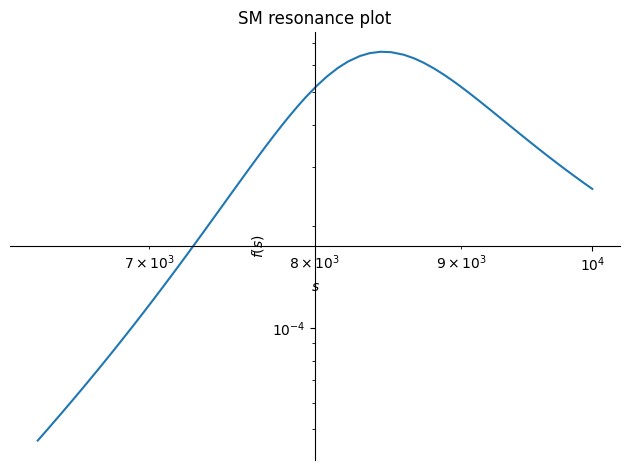

In [157]:
# SM

p1 = plot(sigma_SM.subs(gf, 0.80).subs(gv, 0.80).subs(mf, 30).subs(Mmed, 91).subs(Gamma, 10), (s, 80**2, 100**2),
           title=r'SM resonance plot', 
           show=False,
           xscale= 'log',
           yscale='log',
           autoscale=True)




# p21=plot(Gplot.subs(M,0.106).subs(x,2.3E-5),(E1,0.001,0.053),show=False)
# p21[0].line_color='r'
# p2.append(p21[0])
p1.show()

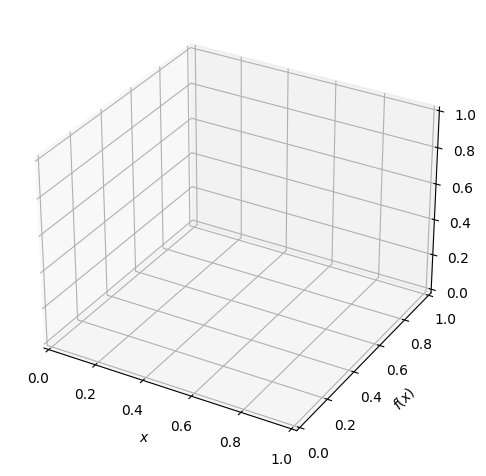

AttributeError: 'Plot' object has no attribute 'clear'

In [154]:
p = plot()
p.clear()

In [156]:
p3 = plot(sigma_DM.subs(gf, 0.80).subs(gv, 0.80).subs(mf, 30).subs(Mmed, 91).subs(Gamma, 10), (s, 80**2, 100**2),
           title=r'SM resonance', 
           show=False,
           xscale= 'log',
           yscale='log',
           autoscale=True)


p3.show()

ValueError: The same variable should be used in all univariate expressions being plotted.